In [30]:
import Pkg;
#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("Random")
#Pkg.add("StatsBase")
#Pkg.add("Statistics")
#Pkg.add("Zygote")
#Pkg.add("LinearAlgebra")
#Pkg.add("Plots")
#Pkg.add("CategoricalArrays")
#Pkg.add("XLSX")
#Pkg.add("DelimitedFiles")

using LinearAlgebra
using Statistics
using Distributions
using CSV
using DataFrames
using Pkg
using Random
using StatsBase
using Statistics
using LinearAlgebra
using Zygote
using Plots 
using CategoricalArrays
using ExcelFiles
using DataFrames
using XLSX
using MAT
using SavitzkyGolay
using Dates
using StatsBase, Random
using DelimitedFiles 
using Distributions
#Pkg.add("StatsFuns")
using StatsFuns

include("MSPC.jl") # adds the file with the function

model = Dict(:sp => 0.3, # how many of the samples do we need in each iteration [%]
    :dim => 3, # how many noLVs
    :nsamp => 2, #the number of sub-samplings
    :learnRate => 0.2, #the learning rate
    :gradClip => 0.5,
    :kernelType => "gaussian",  # can be "matern5/2", "gaussian", "cauchy", "matern3/2", "matern1/2"
    :kernelVersion => "individual", #can be "individual" (each variable own kernel), "combined" (all vars same kernel)
    # "family" - all the kernel types summed up, with their own parameter, "withPCA" does PCA before 
    :dataset    => "tenessee",
    :dataSubset => [1], # here you can train with more faults. 1, ..., 21
    :testFault => 1, # the fault you want to test with
    :iter => 100, 
    :plot => 0, 
    :scale => false, # if you wish to scale the data before 
    :α => 0.95, 
    :paper => 1)

model = loadData(model)


Size of X_healthy before: (960, 52)
Size of X_faulty before: (480, 52)
Size of X_test(960, 52)
Size of X_healthy after: (960, 52)
Size of X_faulty after: (480, 52)


Dict{Symbol, Any} with 20 entries:
  :α             => 0.95
  :testFault     => 1
  :gradClip      => 0.5
  :scale         => false
  :sp            => 0.3
  :dataset       => "tenessee"
  :initialParams => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, …
  :paper         => 1
  :dataSubset    => [1]
  :nsamp         => 2
  :kernelVersion => "individual"
  :XFaulty       => [0.23766 3641.3 … 40.641 15.562; 0.23591 3645.3 … 41.24 19.…
  :dim           => 3
  :plot          => 0
  :XTest         => [0.25025 3657.2 … 41.841 18.049; 0.25135 3662.1 … 41.188 18…
  :iter          => 100
  :XHealthy      => [0.24889 3702.3 … 41.384 18.905; 0.24904 3666.2 … 41.658 18…
  :YTest         => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, …
  :kernelType    => "gaussian"
  :learnRate     => 0.2

10
20
30
40
50
60
70
80
90
100


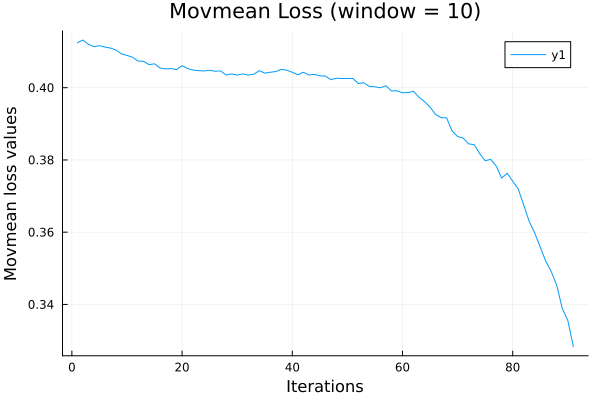

In [31]:
include("MSPC.jl")
model, parameterHistory, lossHistory, gradHistory = optimize_parameters(model)
plt = plot(model[:runningLoss])
plot!(title = "Movmean Loss (window = 10)", xlabel = "Iterations", ylabel = "Movmean loss values")
display(plt)

if model[:plot] == 1
    for i = 1:model[:np]
        plt = plot(parameterHistory[:,i])
        plot!(title = "Parameter history", xlabel = "Iterations", ylabel = "Parameter 1")#    display(plt)

        #plt = plot(gradHistory[2:end,i])
        #plot!(title = "Gradient history", xlabel = "Iterations", ylabel = "Gradient component")
        display(plt)
    end
end

10
20
30
40
50
60
70
80
90
100


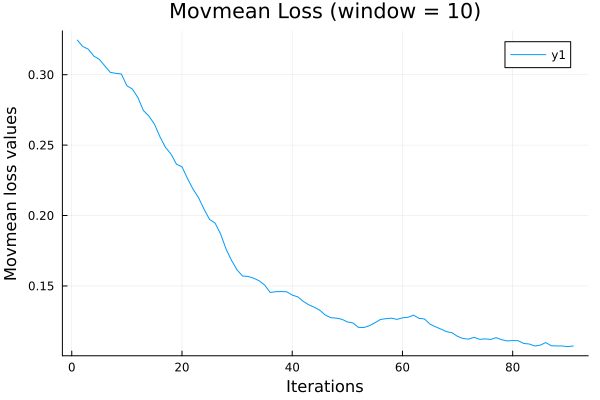

In [32]:
include("MSPC.jl")
model[:initialParams] = vec(model[:bestParam])
model, parameterHistory, lossHistory, gradHistory = optimize_parameters(model)
plt = plot(model[:runningLoss])
plot!(title = "Movmean Loss (window = 10)", xlabel = "Iterations", ylabel = "Movmean loss values")
display(plt)

if model[:plot] == 1
    for i = 1:model[:np]
        plt = plot(parameterHistory[:,i])
        plot!(title = "Parameter history", xlabel = "Iterations", ylabel = "Parameter 1")#    display(plt)

        #plt = plot(gradHistory[2:end,i])
        #plot!(title = "Gradient history", xlabel = "Iterations", ylabel = "Gradient component")
        display(plt)
    end
end

10
20
30
40
50
60
70
80
90
100


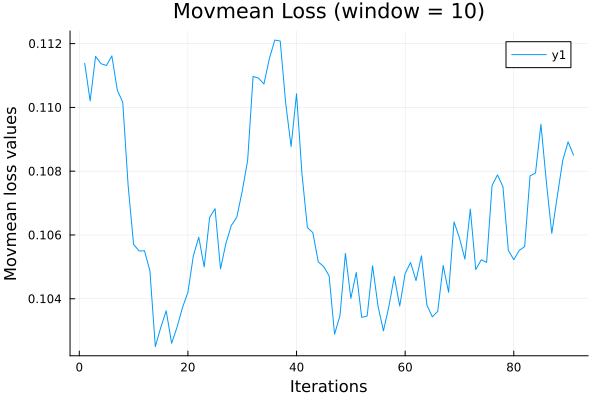

In [33]:
include("MSPC.jl")
model[:initialParams] = vec(model[:bestParam])
model, parameterHistory, lossHistory, gradHistory = optimize_parameters(model)
plt = plot(model[:runningLoss])
plot!(title = "Movmean Loss (window = 10)", xlabel = "Iterations", ylabel = "Movmean loss values")
display(plt)

if model[:plot] == 1
    for i = 1:model[:np]
        plt = plot(parameterHistory[:,i])
        plot!(title = "Parameter history", xlabel = "Iterations", ylabel = "Parameter 1")#    display(plt)

        #plt = plot(gradHistory[2:end,i])
        #plot!(title = "Gradient history", xlabel = "Iterations", ylabel = "Gradient component")
        display(plt)
    end
end

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


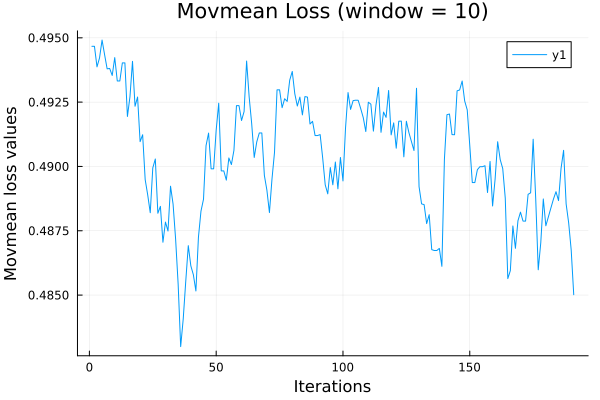

In [29]:
include("MSPC.jl")
model[:initialParams] = vec(model[:bestParam])
model, parameterHistory, lossHistory, gradHistory = optimize_parameters(model)
plt = plot(model[:runningLoss])
plot!(title = "Movmean Loss (window = 10)", xlabel = "Iterations", ylabel = "Movmean loss values")
display(plt)

if model[:plot] == 1
    for i = 1:model[:np]
        plt = plot(parameterHistory[:,i])
        plot!(title = "Parameter history", xlabel = "Iterations", ylabel = "Parameter 1")#    display(plt)

        #plt = plot(gradHistory[2:end,i])
        #plot!(title = "Gradient history", xlabel = "Iterations", ylabel = "Gradient component")
        display(plt)
    end
end

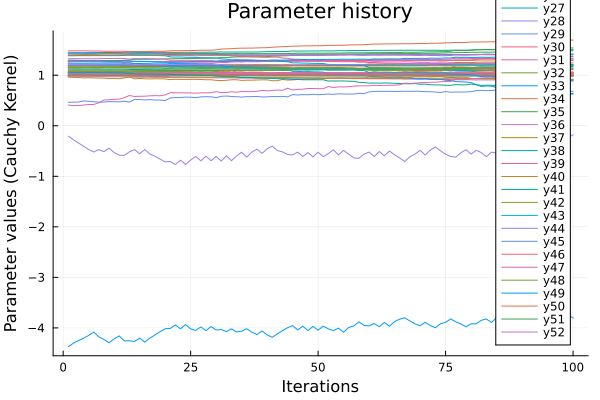

Saved variables to DCaseParam.mat


In [34]:
plt = plot(parameterHistory)
plot!(title = "Parameter history", xlabel = "Iterations", ylabel = "Parameter values (Cauchy Kernel)")
display(plt)


using MAT

# Define the file path (change "my_data.mat" to your preferred filename)
file_path = "DCaseParam.mat"

# Save variables to .mat file
matwrite(file_path, Dict(
    "paramHistory" => parameterHistory,
    
))

println("Saved variables to ", file_path)

0.5
2.5
4.5
6.5
8.5
10.5
12.5
14.5
16.5
18.5
0.5
2.5
4.5
6.5
8.5
10.5
12.5
14.5
16.5
18.5
0.5
2.5
4.5
6.5
8.5
10.5
12.5
14.5
16.5
18.5
0.5
2.5
4.5
6.5
8.5
10.5
12.5
14.5
16.5
18.5
0.5
2.5
4.5
6.5
8.5
10.5
12.5
14.5
16.5
18.5
0.5
2.5
4.5
6.5
8.5
10.5
12.5
14.5
16.5
18.5
0.5
2.5
4.5
6.5
8.5
10.5
12.5
14.5
16.5
18.5


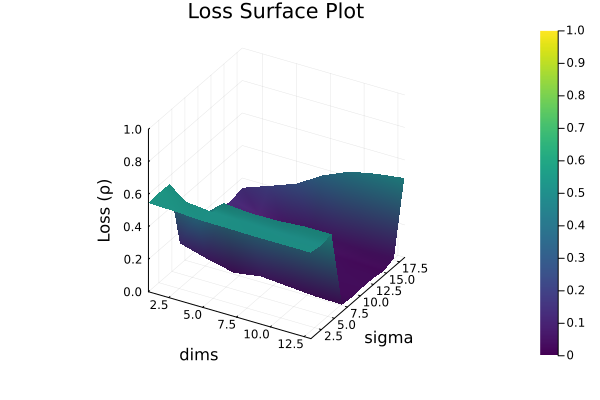

In [16]:
using Plots

include("MSPC.jl")
model[:kernelType] = "cauchy"
model[:kernelVersion] = "combined"
# Define the ranges for i and j
i_values = 1:2:13
j_values = 0.5:2:20

# Initialize the loss matrix
rho_values = zeros(length(i_values), length(j_values))

# Compute the loss values
for (i_idx, i) in enumerate(i_values)
    for (j_idx, j) in enumerate(j_values)
        println(j)
        KHealthy = kernelRBF2(model[:XHealthy], exp.([j, 0.0]), model, "training")
        model[:dim] = i
        T, P, λ = compute_pca(KHealthy, model[:dim])
        T²lim  = computeT2Limit(T, λ, model[:dim], model[:α])

        XHSam  = model[:XHealthy]
        XFSam  = model[:XFaulty]
        XMixed = vcat(XHSam, XFSam)
        Kₛ     = kernelRBFTest(model[:XHealthy], XMixed, exp.([j, 0.0]), model)   
        Ttest  = computeScores(Kₛ, P, model[:dim])
        T²test = computeT2(Ttest, λ, model[:dim])

        # Get number of healthy and faulty samples
        n_healthy = size(XHSam, 1)
        n_faulty = size(XFSam, 1)

        yi    = vcat(zeros(n_healthy), ones(n_faulty)) 
        
        # Compute loss)
        rho_values[i_idx, j_idx] = computeLoss(yi, T²test, T²lim)
        # Plot
        #plt = scatter(findall(yi .== 0), T²test[1:n_healthy], color=:blue, label="Healthy", alpha=0.7)
        #scatter!(findall(yi .== 1), T²test[n_healthy+1:end], color=:red, label="Faulty", alpha=0.7)
        #hline!([T²lim], linestyle=:dash, color=:black, label="Control Limit (T²lim)")

        # Labels and formatting
        #xlabel!("Sample Index")
        #ylabel!("T² Statistic")
        #title!("Control Chart for T² Statistics")
        #display(plt)
        
    end
end

# Generate surface plot
#surface(i_values, j_values, rho_values', xlabel="dims", ylabel="sigma", zlabel="Loss (ρ)", title="Loss Surface Plot", cmap=:viridis, clims=(0, 1), zlims=(0, 1))

# Generate surface plot
surface(i_values, j_values, rho_values', xlabel="dims", ylabel="sigma", zlabel="Loss (ρ)", title="Loss Surface Plot", cmap=:viridis, clims=(0, 1), zlims=(0, 1))



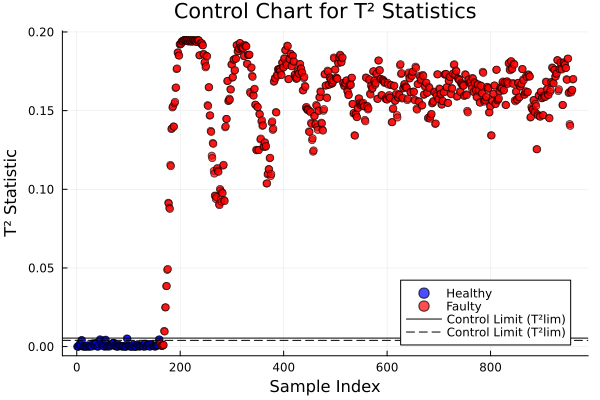

Computing loss for dim = 1
Computing loss for dim = 2
Computing loss for dim = 3
Computing loss for dim = 4
Computing loss for dim = 5
Computing loss for dim = 6
Computing loss for dim = 7
Computing loss for dim = 8
Computing loss for dim = 9
Computing loss for dim = 10


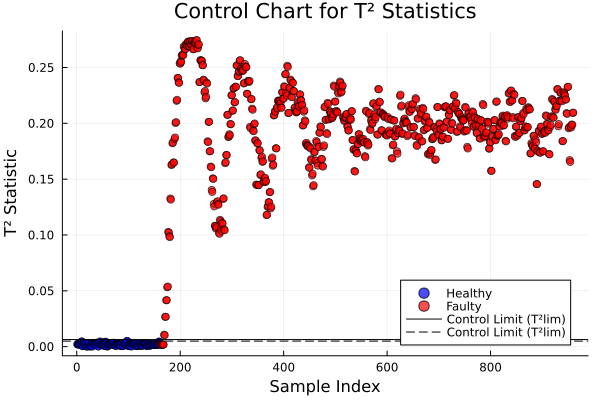

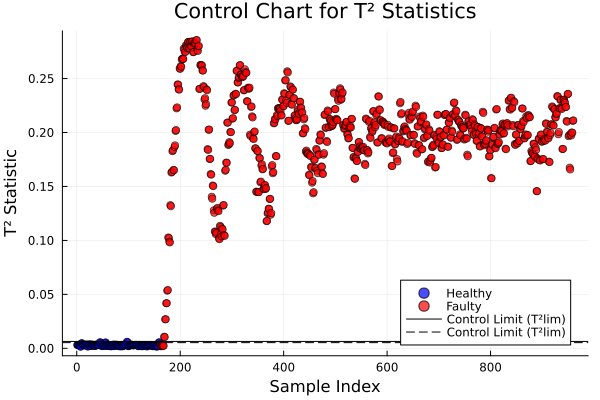

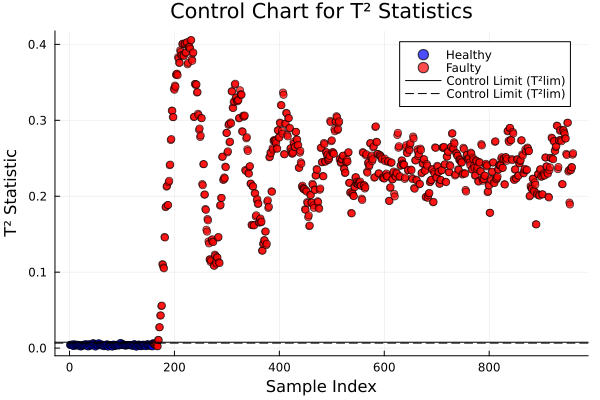

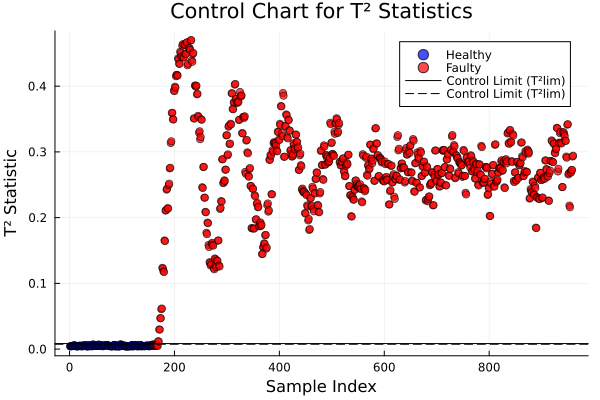

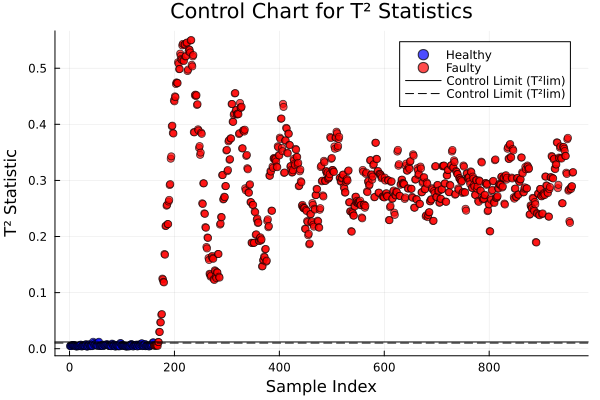

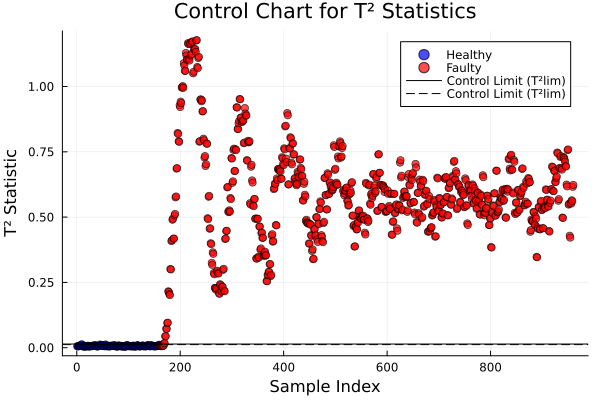

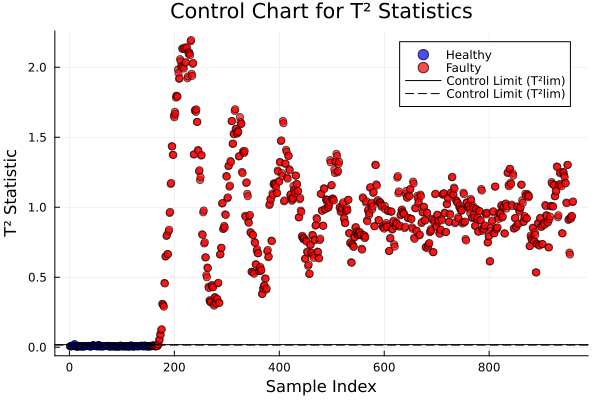

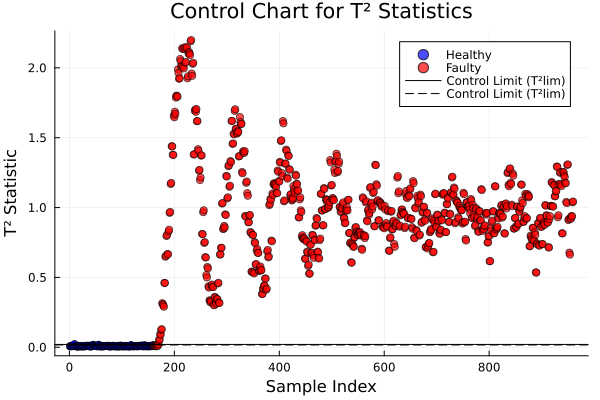

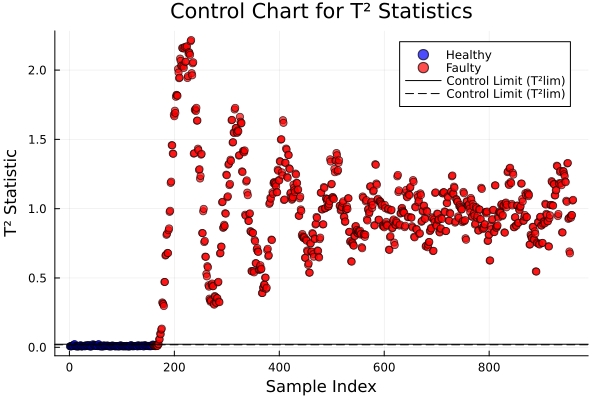

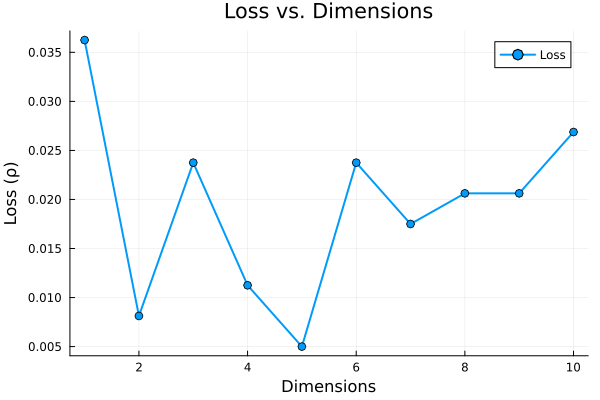

In [35]:
using Plots

# Define the range for dimensions
i_values = 1:10
include("MSPC.jl")
# Initialize the loss vector
rho_values = zeros(length(i_values))
rho_alternative = zeros(length(i_values))

# Compute the loss values
for (i_idx, i) in enumerate(i_values)
    println("Computing loss for dim = $i")
    
    KHealthy = kernelRBF2(model[:XHealthy], exp.(model[:bestParam]), model, "training")
    model[:dim] = i
    T, P, λ = compute_pca(KHealthy, model[:dim])
    T²lim95  = computeT2Limit(T, λ, model[:dim], model[:α])

    Kₛ     = kernelRBFTest(model[:XHealthy], model[:XTest], exp.(model[:bestParam]), model)   
    Ttest  = computeScores(Kₛ, P, model[:dim])
    T²test = computeT2(Ttest, λ, model[:dim])
    T²lim95  = mean(computeT2(T, λ, model[:dim])) + 2 * std(computeT2(T, λ, model[:dim]))
    T²lim99  = mean(computeT2(T, λ, model[:dim])) + 3 * std(computeT2(T, λ, model[:dim]))

    # Compute loss
    rho_values[i_idx] = computeLoss(model[:YTest], T²test, T²lim95)

    plt = scatter(findall(model[:YTest] .== 0), T²test[findall(model[:YTest] .== 0)], color=:blue, label="Healthy", alpha=0.7)
    scatter!(findall(model[:YTest] .== 1), T²test[findall(model[:YTest] .== 1)], color=:red, label="Faulty", alpha=0.7)
    hline!([T²lim99],  color=:black, label="Control Limit (T²lim)")
    hline!([T²lim95], linestyle=:dash, color=:black, label="Control Limit (T²lim)")


    # Labels and formatting
    xlabel!("Sample Index")
    ylabel!("T² Statistic")
    title!("Control Chart for T² Statistics")
    display(plt)

    idxHealthy = findall(model[:YTest] .== 0)
    idxFaulty  = findall(model[:YTest] .== 1)

    ρᵪ = 1.0 - (count(T²test[idxHealthy].< T²lim95)/length(T²test[idxHealthy]) + count(T²test[idxFaulty].> T²lim95)/length(T²test[idxFaulty]))/2.0

    rho_alternative[i_idx] = ρᵪ

    file_path = "d2resultswithScalar.mat"

    matwrite(file_path, Dict(
        "T2values" => T²test,
        "t2lim95"  => T²lim95,
        "t2lim99"  => T²lim99,
        "yTest"    => model[:YTest],
        "paramMatrix" => parameterHistory,
        "loss"     => model[:runningLoss]
    ))
    
end

# Generate 2D plot
plt2 = plot(i_values, rho_alternative, xlabel="Dimensions", ylabel="Loss (ρ)", title="Loss vs. Dimensions",
     marker=:o, linewidth=2, label="Loss", grid=true)
display(plt2)


In [157]:
println(rho_values)

[0.5006313420821265 0.5012910555779271 0.49919838035204167 0.49366191253394076 0.4933934145206378 0.4933883762104646 0.4933882838888304 0.4933882821501898 0.49338828226843123 0.49338851840477793 0.4942398686526944 0.5002046867524802 0.5 0.5 0.5; 0.5021277391718784 0.5035341484107567 0.4960772905823865 0.47006394138774676 0.469007634000535 0.4689881612071425 0.46898780454764477 0.4689877972784384 0.46898778687050324 0.46899360112069854 0.4933803923919554 0.49611376374246174 0.5000000000000004 0.5000000000000004 0.5000000000000004; 0.5038829325186175 0.5060851620603528 0.44532653929822763 0.40771423434175025 0.4072582674872217 0.4072486681048261 0.4072484917786765 0.4072485305214908 0.4072491107126476 0.4072731165922815 0.45038105162243114 0.49413377744609543 0.4999999999999989 0.4999999999999989 0.4999999999999989; 0.5056157577212533 0.5086173687939655 0.43798994022532023 0.2703294756814394 0.269676695016448 0.26966558820981645 0.2696653846040016 0.2696653447302322 0.26966672893788046 0

NOTE! Run this only if you want a full factorial design to hypertune the model.

In [ ]:
using DataFrames, CSV, Plots

include("MSPC.jl")

dims = [1, 3, 5]
learning_rates = [0.2, 0.5]
grad_clips = [0.5, 1.0]
kernel_types = ["gaussian", "cauchy"]
kernel_versions = ["individual", "combined"]
papers = [1, 2]
scales = [true, false]

results = DataFrame(dim = Int[], learnRate = Float64[], gradClip = Float64[],
                    kernelType = String[], kernelVersion = String[], paper = Int[],
                    scale = Bool[], minLoss = Any[])

for dim in dims, learnRate in learning_rates, gradClip in grad_clips,
    kernelType in kernel_types, kernelVersion in kernel_versions,
    paper in papers, scale in scales

    model = Dict(:sp => 0.3,
                 :dim => dim,
                 :nsamp => 1,
                 :learnRate => learnRate,
                 :gradClip => gradClip,
                 :kernelType => kernelType,
                 :kernelVersion => kernelVersion,
                 :dataset => "tenessee",
                 :dataSubset => 1,
                 :iter => 200,
                 :plot => 0,
                 :scale => scale,
                 :α => 0.95,
                 :paper => paper) 

    try
        model = loadData(model)
        model, parameterHistory, lossHistory, gradHistory = optimize_parameters(model)

        min_loss = minimum(model[:runningLoss])

        push!(results, (dim, learnRate, gradClip, kernelType, kernelVersion, paper, scale, min_loss))
    catch
        push!(results, (dim, learnRate, gradClip, kernelType, kernelVersion, paper, scale, "failed"))
    end
end

CSV.write("full_factorial_results.csv", results)

display(results)